Null hypothesis: When height of the disc increases after implantation, there will be no statistical change in the ROM


Alternate hypothesis: When the height of the disc increases after implantation, the mean ROM of the patients will decrease

In [38]:
# importing different libraries
import seaborn as sns; sns.set()
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import random as rand
import scipy.stats  

# creating variable height ROM (HR) by reading the csv
HR = pd.read_csv("Height and ROM.csv")
HR

,Time,ROM M,ROM SD,Height M,Height SD
0,Preop,28.2,25.7,7.9,1.4
1,48 months,26.4,9.9,9.1,1.1
2,96 months,20.2,11.8,11.3,2.7


In [39]:
# describing columns
HR[' ROM M'].describe()

count     3.000000
mean     24.933333
std       4.196824
min      20.200000
25%      23.300000
50%      26.400000
75%      27.300000
max      28.200000
Name:  ROM M, dtype: float64

In [40]:
# describing columns
HR['ROM SD'].describe()

count     3.000000
mean     15.800000
std       8.626123
min       9.900000
25%      10.850000
50%      11.800000
75%      18.750000
max      25.700000
Name: ROM SD, dtype: float64

In [41]:
# describing columns
HR['Height M'].describe()

count     3.000000
mean      9.433333
std       1.724336
min       7.900000
25%       8.500000
50%       9.100000
75%      10.200000
max      11.300000
Name: Height M, dtype: float64

In [42]:
# describing columns
HR['Height SD'].describe()

count    3.000000
mean     1.733333
std      0.850490
min      1.100000
25%      1.250000
50%      1.400000
75%      2.050000
max      2.700000
Name: Height SD, dtype: float64

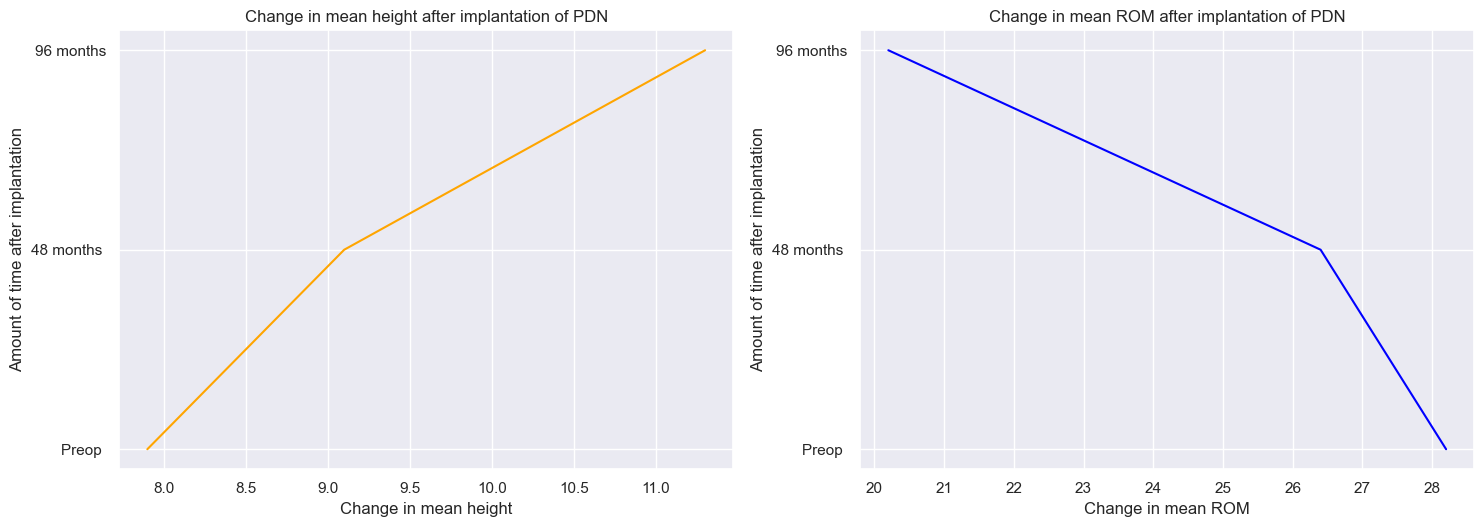

In [43]:
# creation of a data frame for the data set, calling columns for each variable for ease of access 

df = pd.DataFrame(HR)
T = list(df.iloc[:,0])
RM = list(df.iloc[:,1])
RS = list(df.iloc[:,2])
HM = list(df.iloc[:,3])
HS = list(df.iloc[:,4])


# Plotting line graphs
plt.figure(figsize=(15, 10))


# Line graph for change in mean height 
plt.subplot(2, 2, 1)
plt.plot(HM, T, color='orange', label='Mean height change')
plt.title('Change in mean height after implantation of PDN')
plt.xlabel('Change in mean height')
plt.ylabel('Amount of time after implantation')


# Line graph for the change in mean ROM
plt.subplot(2, 2, 2)
plt.plot(RM, T, color='blue', label='Mean ROM change')
plt.title('Change in mean ROM after implantation of PDN')
plt.xlabel('Change in mean ROM')
plt.ylabel('Amount of time after implantation')



plt.tight_layout()
plt.show()




From these two line graphs it can be seen that the mean change in height after implantation of the PDN corresponds to a decrease in the mean change in the ROM after implantation

The mean height and ROM change were shown to have a pearson correlation value of - 0.99, showing a negative correlation, which rounded up is a strong correlation of -1, meaning when one variable increases, the other decreases and vice versa

In [44]:

# creating arrays for mean height and ROM
x = np.array([7.9, 9.1, 11.3])
y = np.array([28.2, 26.4, 20.2])

# for linear regression, need two arrays which are same length 
result = scipy.stats.linregress(x, y)


# by unhashing one can find the slope, p value, standard error of estimated gradient and r value 
result.slope
#result.pvalue
#result.stderr
#result.rvalue



-2.4103139013452908

slope = -2.4103139013452908

p value = 0.08866066229116626

standard error = 0.33786641313563237

r value = -0.9903178983146026 

P value of 0.08 means that the Null hypothesis cant be rejected as it is p>0.05 

r value shown as -0.99, -1 is a perfect negative correlation, so therefore it can be deduced that this data is also at a strong negative correlation.

SE seen as 0.34 when rounded up, this would mean that the values such as the mean could be 0.34 away from the population values 

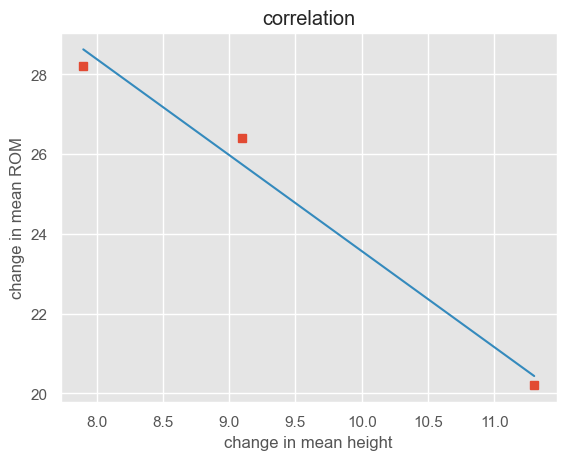

In [45]:
# "ggplot" style, which adjusts the style to emulate ggplot (a popular plotting package for R).
plt.style.use('ggplot')

# creating arrays for mean height and ROM
x = np.array([7.9, 9.1, 11.3])
y = np.array([28.2, 26.4, 20.2])
xy = np.array([[7.9, 9.1, 11.3],
              [28.2, 26.4, 20.2]])


# creation of an f string 
slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'

# plotting the graph 
fig, ax = plt.subplots()
ax.plot(x, y, linewidth = 0, marker='s', label='Data points')
ax.plot(x, intercept + slope * x, label=line)
plt.title('correlation')
plt.xlabel('change in mean height')
plt.ylabel('change in mean ROM')

plt.show()



creating a correlation graph allows an easier way to visualise the data, again showing the negative correlation as seen from the negative slope as seen from the graph above and from the calculating slope being -2.41. 

 Why use Monte Carlo simulation? by using Monte Carlo simulation we can look at the probability of the outcomes of a simulated study, this is useful as it allows for us to have a look at a prediction of what the studies will look like without having to preform hundreds if not thousands of studies to gain the same data, which saves on time and expenses.

 However, these simulations may not be completely reliable as they rely on assumptions that may not apply in the real world.


As the data in the study is very little, a Monte Carlo can be done to simulate and then this simulated data can be used 

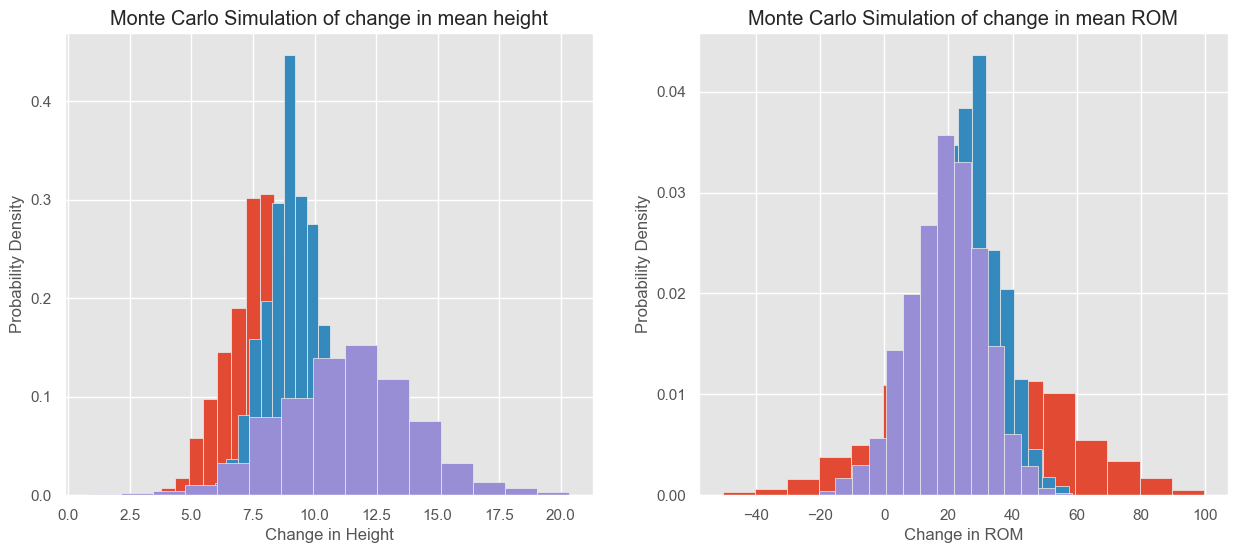

In [46]:
# to use multiple means and standard deviations an array must be created, arrays created for both variables
mean_height = np.array([7.9, 9.1, 11.3])
std_height = np.array([1.4, 1.1, 2.7])

mean_ROM = np.array([28.2, 26.4, 20.2])
std_ROM = np.array([25.7, 9.9, 11.8])

# number of simulations 
num_simulations = 1000

# np.concatenate joins together mutliple arrays and combines them, in this case for the variables that have been zipped together
Height_sims = np.concatenate([np.random.normal(mean, std_dev, num_simulations) for mean, std_dev in zip(mean_height, std_height)])
ROM_sims = np.concatenate([np.random.normal(mean, std_dev, num_simulations) for mean, std_dev in zip(mean_ROM ,std_ROM)])

# Plotting separate histograms for each variable and preop, 48 and 96 months after implantation
plt.figure(figsize=(15, 6))

# creating subplot for mean height sim
plt.subplot(1, 2, 1)
for label, (mean, std_dev) in zip(["Preop", "48 months", "96 months"], zip(mean_height, std_height)):
    plt.hist(np.random.normal(mean, std_dev, num_simulations), bins=15, density=True, label = label)
plt.title('Monte Carlo Simulation of change in mean height')
plt.xlabel('Change in Height')
plt.ylabel('Probability Density')


# creating subplot for mean ROM sim
plt.subplot(1, 2, 2)
for label, (mean, std_dev) in zip(["Preop", "48 months", "96 months"], zip(mean_ROM, std_ROM)):
    plt.hist(np.random.normal(mean, std_dev, num_simulations), bins=15, density=True, label = label )
plt.title('Monte Carlo Simulation of change in mean ROM')
plt.xlabel('Change in ROM')
plt.ylabel('Probability Density')

plt.show()


In [47]:
# Shapiro-Wilk test for normality 
from scipy.stats import shapiro 


Height_sims = np.concatenate([np.random.normal(mean, std_dev, num_simulations) for mean, std_dev in zip(mean_height, std_height)])
ROM_sims = np.concatenate([np.random.normal(mean, std_dev, num_simulations) for mean, std_dev in zip(mean_ROM ,std_ROM)])

# creating a variable 'simulated_data' 
simulated_data = Height_sims + ROM_sims

# prints the shapiro-wilk statistic aswell as the p-value
print(f'shapiro simulated data: {shapiro(simulated_data)}')

shapiro simulated data: ShapiroResult(statistic=0.9755802154541016, pvalue=2.8495107400648553e-22)


From using the Monte Carlo's simulated data, the Shapiro-Wilk statistic is 0.97, this would mean that the data is almost normal in nature as the value of 1 would mean its a perfect normal distribution. The p-value given is 5.46*10^-24, this is incredibly small, however from this if you take it as it is, this would mean that you would reject the null hypothesis as p<0.05. 

From the findings from the Hippokratia paper it shows a negative correlation between the preop and post-op implantation of the PDN, however due to the limited number of patients in this study, I believe creating another notebook with a larger, simulated number of patients would provide clarity on this correlation to see if this trend would change or stay much the same. 